In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Expolatory Data Analysis

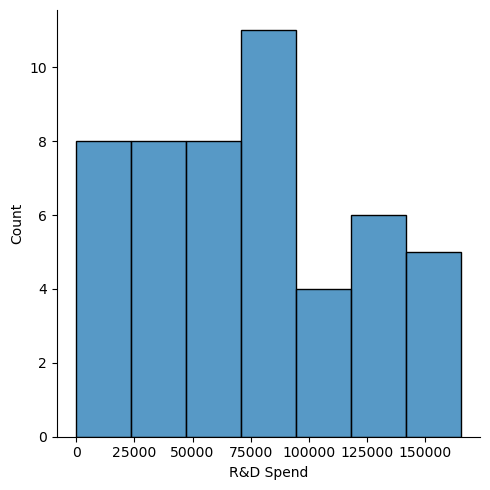

In [4]:
sns.displot(x=data["R&D Spend"],data=data)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

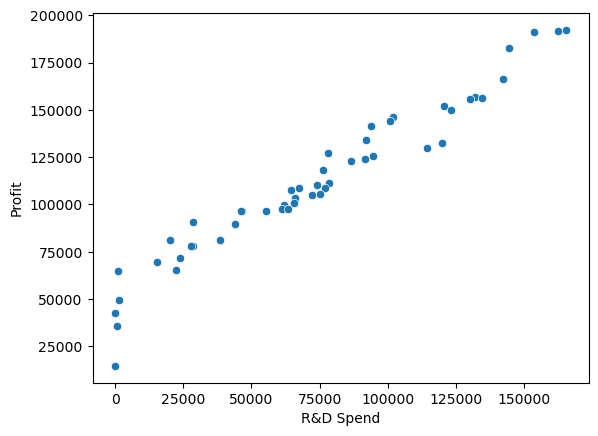

In [5]:
sns.scatterplot(x=data["R&D Spend"],y=data["Profit"],data=data)

<Axes: xlabel='Administration', ylabel='Profit'>

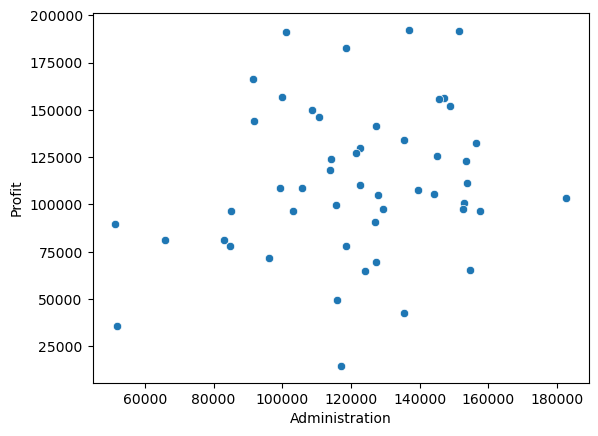

In [6]:
sns.scatterplot(x=data["Administration"],y=data["Profit"],data=data)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

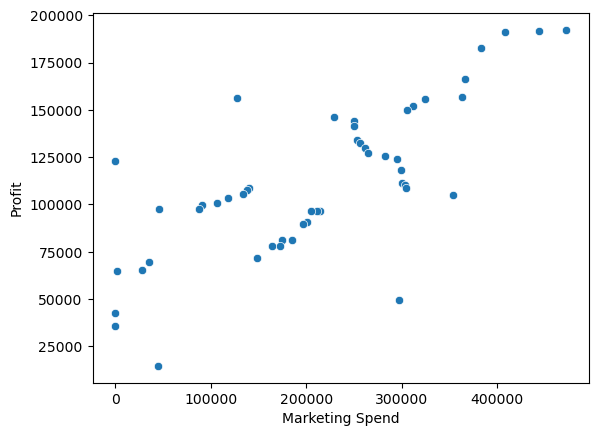

In [7]:
sns.scatterplot(x=data["Marketing Spend"],y=data["Profit"],data=data)

<Axes: xlabel='State', ylabel='Profit'>

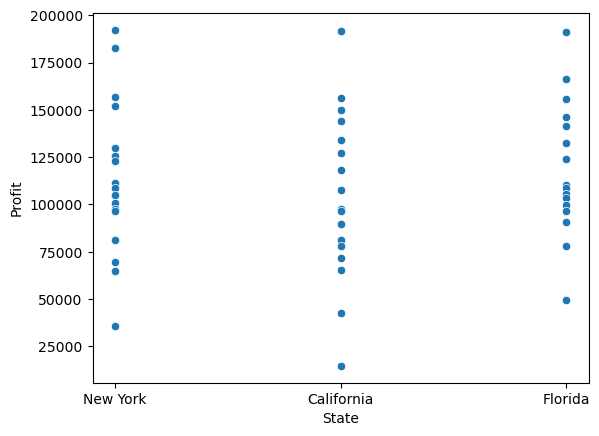

In [8]:
sns.scatterplot(x=data["State"],y=data["Profit"],data=data)

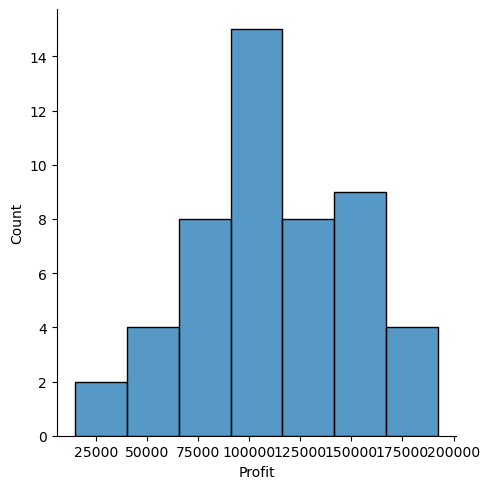

In [9]:
sns.displot(x=data["Profit"],data=data)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## checking null values

In [12]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## coorelation

C:\Users\parit\AppData\Local\Temp\ipykernel_30852\3284826886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,annot=True)


<Axes: >

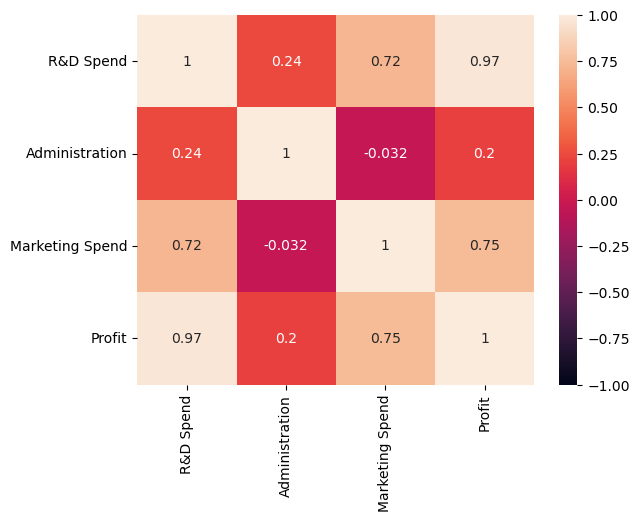

In [13]:
sns.heatmap(data.corr(),vmin=-1,annot=True)

In [14]:
y=data["Profit"]
x=data[["R&D Spend","Administration","Marketing Spend"]]

## Multiple linear regression

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin=LinearRegression()

In [19]:
model=lin.fit(x_train,y_train)

In [20]:
print("accuracy score of training data=",model.score(x_train,y_train))

accuracy score of training data= 0.9554574067620704


In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test,model.predict(x_test))
print("r2_score of testing data=",r2_score(y_test,model.predict(x_test)))

r2_score of testing data= 0.8840450717034997


In [23]:
x_test.head()

,R&D Spend,Administration,Marketing Spend
40,28754.33,118546.05,172795.67
45,1000.23,124153.04,1903.93
13,91992.39,135495.07,252664.93
23,67532.53,105751.03,304768.73
5,131876.90,99814.71,362861.36


In [24]:
pred=model.predict(x_test)

In [25]:
x_test["Actual"] = y_test
x_test["predicted"] = pred

In [26]:
x_test

,R&D Spend,Administration,Marketing Spend,Actual,predicted
40,28754.33,118546.05,172795.67,78239.91,71970.697726
45,1000.23,124153.04,1903.93,64926.08,44074.868220
13,91992.39,135495.07,252664.93,134307.35,126247.322971
23,67532.53,105751.03,304768.73,108733.99,108932.357905
5,131876.90,99814.71,362861.36,156991.12,165448.633709
43,15505.73,127382.30,35534.17,69758.98,56920.617485
34,46426.07,157693.92,210797.67,96712.80,84802.117721
38,20229.59,65947.93,185265.10,81229.06,69107.980916
48,542.05,51743.15,0.00,35673.41,49300.113275
25,64664.71,139553.16,137962.62,107404.34,100099.191953
